<a href="https://colab.research.google.com/github/Analyst-Abhranil/Data-Visualization-Projects/blob/main/Data_Visualization_on_House_Sales_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dir="/content/drive/MyDrive/AlmaBetter/Data/"

In [ ]:
pp_df=pd.read_csv(dir+'pp-2018.csv',names=['TID','price','sale date','postcode','property type','new build','tenure','Paon','Saon','street','locality','town/city','district','county','ppd category','record status'],parse_dates=['sale date'])


In [ ]:
df=pp_df.copy()
df.head()

,TID,price,sale date,postcode,property type,new build,tenure,Paon,Saon,street,locality,town/city,district,county,ppd category,record status
0,{666758D7-43A9-3363-E053-6B04A8C0D74E},405000,2018-01-25,WR15 8LH,D,N,F,RAMBLERS WAY,NaN,NaN,BORASTON,TENBURY WELLS,SHROPSHIRE,SHROPSHIRE,A,A
1,{666758D7-43AA-3363-E053-6B04A8C0D74E},315000,2018-01-23,SY7 8QA,D,N,F,MONT CENISE,NaN,NaN,CLUN,CRAVEN ARMS,SHROPSHIRE,SHROPSHIRE,A,A
2,{666758D7-43AD-3363-E053-6B04A8C0D74E},165000,2018-01-19,SY1 2BF,T,Y,F,42,NaN,PENSON WAY,NaN,SHREWSBURY,SHROPSHIRE,SHROPSHIRE,A,A
3,{666758D7-43B0-3363-E053-6B04A8C0D74E},370000,2018-01-22,SY8 4DF,D,N,F,WILLOW HEY,NaN,NaN,ASHFORD CARBONEL,LUDLOW,SHROPSHIRE,SHROPSHIRE,A,A
4,{666758D7-43B3-3363-E053-6B04A8C0D74E},320000,2018-01-19,TF10 7ET,D,N,F,3,NaN,PRINCESS GARDENS,NaN,NEWPORT,WREKIN,WREKIN,A,A


In [ ]:
df.shape

(1024432, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024432 entries, 0 to 1024431
Data columns (total 16 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   TID            1024432 non-null  object        
 1   price          1024432 non-null  int64         
 2   sale date      1024432 non-null  datetime64[ns]
 3   postcode       1018507 non-null  object        
 4   property type  1024432 non-null  object        
 5   new build      1024432 non-null  object        
 6   tenure         1024432 non-null  object        
 7   Paon           1024432 non-null  object        
 8   Saon           140446 non-null   object        
 9   street         1004772 non-null  object        
 10  locality       386023 non-null   object        
 11  town/city      1024432 non-null  object        
 12  district       1024428 non-null  object        
 13  county         1024432 non-null  object        
 14  ppd category   1024432 non-null  o

Select only record type 'A', property type other than 'O' and transactions for only 2018

In [ ]:
df=df[df['record status']=='A']

In [ ]:
df=df[df['property type']!='O']

In [ ]:
df=df[df['sale date'].dt.year==2018]

In [ ]:
df.shape

(959003, 16)

# Find the trend of sales volumes across months in the year 2018

In [ ]:
df['month']=df['sale date'].dt.month

In [ ]:
df.head()

,TID,price,sale date,postcode,property type,new build,tenure,Paon,Saon,street,locality,town/city,district,county,ppd category,record status,month
0,{666758D7-43A9-3363-E053-6B04A8C0D74E},405000,2018-01-25,WR15 8LH,D,N,F,RAMBLERS WAY,NaN,NaN,BORASTON,TENBURY WELLS,SHROPSHIRE,SHROPSHIRE,A,A,1
1,{666758D7-43AA-3363-E053-6B04A8C0D74E},315000,2018-01-23,SY7 8QA,D,N,F,MONT CENISE,NaN,NaN,CLUN,CRAVEN ARMS,SHROPSHIRE,SHROPSHIRE,A,A,1
2,{666758D7-43AD-3363-E053-6B04A8C0D74E},165000,2018-01-19,SY1 2BF,T,Y,F,42,NaN,PENSON WAY,NaN,SHREWSBURY,SHROPSHIRE,SHROPSHIRE,A,A,1
3,{666758D7-43B0-3363-E053-6B04A8C0D74E},370000,2018-01-22,SY8 4DF,D,N,F,WILLOW HEY,NaN,NaN,ASHFORD CARBONEL,LUDLOW,SHROPSHIRE,SHROPSHIRE,A,A,1
4,{666758D7-43B3-3363-E053-6B04A8C0D74E},320000,2018-01-19,TF10 7ET,D,N,F,3,NaN,PRINCESS GARDENS,NaN,NEWPORT,WREKIN,WREKIN,A,A,1


In [ ]:
monthly_sales_volume=df['month'].value_counts().sort_index()
monthly_sales_volume

month
1     65004
2     66959
3     78070
4     67094
5     76325
6     90178
7     83082
8     95382
9     77836
10    86892
11    92427
12    79754
Name: count, dtype: int64

Text(0, 0.5, 'Total Sales')

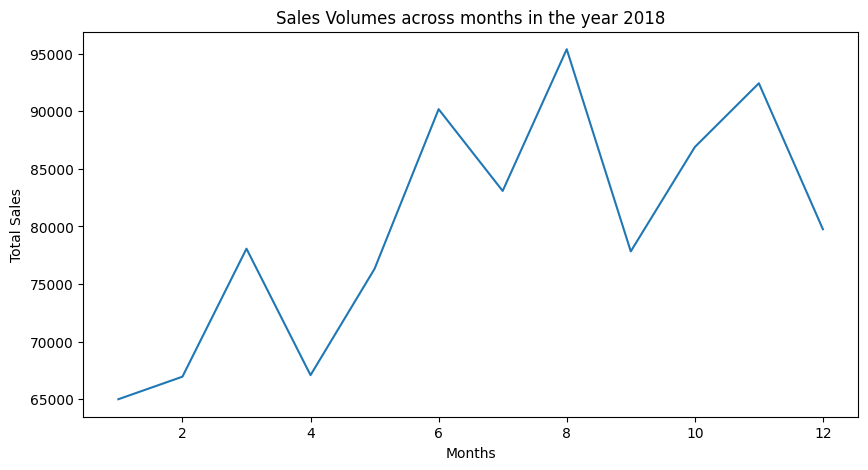

In [ ]:
plt.rcParams['figure.figsize']=(10,5)
plt.plot(monthly_sales_volume)
plt.title('Sales Volumes across months in the year 2018')
plt.xlabel('Months')
plt.ylabel('Total Sales')

# Problem 2: Observe the daily sales volume in the month of July

In [ ]:
july_df=df[df['month']==7]
july_df

,TID,price,sale date,postcode,property type,new build,tenure,Paon,Saon,street,locality,town/city,district,county,ppd category,record status,month
835,{79A74E21-D135-1289-E053-6B04A8C01627},84000,2018-07-20,OL9 8LS,T,N,L,6,NaN,WHITEGATE LANE,CHADDERTON,OLDHAM,OLDHAM,GREATER MANCHESTER,A,A,7
1044,{773788C2-6D59-2CE4-E053-6C04A8C05E57},228000,2018-07-27,EX16 6AE,D,N,F,11,NaN,MERCERS CLOSE,NaN,TIVERTON,MID DEVON,DEVON,A,A,7
1055,{773788C2-6D60-2CE4-E053-6C04A8C05E57},330000,2018-07-30,EX16 7BL,T,N,F,HOLLY TREE BARN,NaN,CHAINS ROAD,SAMPFORD PEVERELL,TIVERTON,MID DEVON,DEVON,A,A,7
1123,{79A74E21-B602-1289-E053-6B04A8C01627},140000,2018-07-25,OL11 4DD,S,N,L,24,NaN,LINKS VIEW,NaN,ROCHDALE,ROCHDALE,GREATER MANCHESTER,A,A,7
1214,{79A74E21-BC74-1289-E053-6B04A8C01627},375000,2018-07-26,PR3 0ZL,D,N,F,THE COTTAGE,NaN,WEST END,GREAT ECCLESTON,PRESTON,WYRE,LANCASHIRE,A,A,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024095,{80E1AA98-B375-7BF8-E053-6C04A8C00BF2},483000,2018-07-30,SE22 8PS,F,N,L,62B,NaN,EAST DULWICH GROVE,EAST DULWICH,LONDON,SOUTHWARK,GREATER LONDON,A,A,7
1024231,{80E1AA98-BA30-7BF8-E053-6C04A8C00BF2},219000,2018-07-02,DA1 5WU,F,Y,L,92,NaN,MILL POND ROAD,NaN,DARTFORD,DARTFORD,KENT,A,A,7
1024234,{80E1AA98-BA34-7BF8-E053-6C04A8C00BF2},332500,2018-07-20,DA1 5RF,T,Y,F,16,NaN,RAINBOW GARDENS,NaN,DARTFORD,DARTFORD,KENT,A,A,7
1024267,{80E1AA98-9136-7BF8-E053-6C04A8C00BF2},637500,2018-07-30,SW19 4QP,F,N,L,"ROCKWELL COURT, 48",FLAT 2,RIDGWAY,NaN,LONDON,MERTON,GREATER LONDON,A,A,7


In [ ]:
daily_sales_volume=july_df['sale date'].value_counts().sort_index()
daily_sales_volume

sale date
2018-07-01       18
2018-07-02     2931
2018-07-03     1828
2018-07-04     2064
2018-07-05     2358
2018-07-06     8400
2018-07-07       18
2018-07-08       11
2018-07-09     2259
2018-07-10     1985
2018-07-11     2165
2018-07-12     3568
2018-07-13     6561
2018-07-14       25
2018-07-15       20
2018-07-16     2883
2018-07-17     1933
2018-07-18     2438
2018-07-19     2571
2018-07-20     8802
2018-07-21       21
2018-07-22       13
2018-07-23     2742
2018-07-24     2116
2018-07-25     2710
2018-07-26     2965
2018-07-27    11145
2018-07-28       31
2018-07-29       25
2018-07-30     3429
2018-07-31     5047
Name: count, dtype: int64

Text(0, 0.5, 'Total Sales')

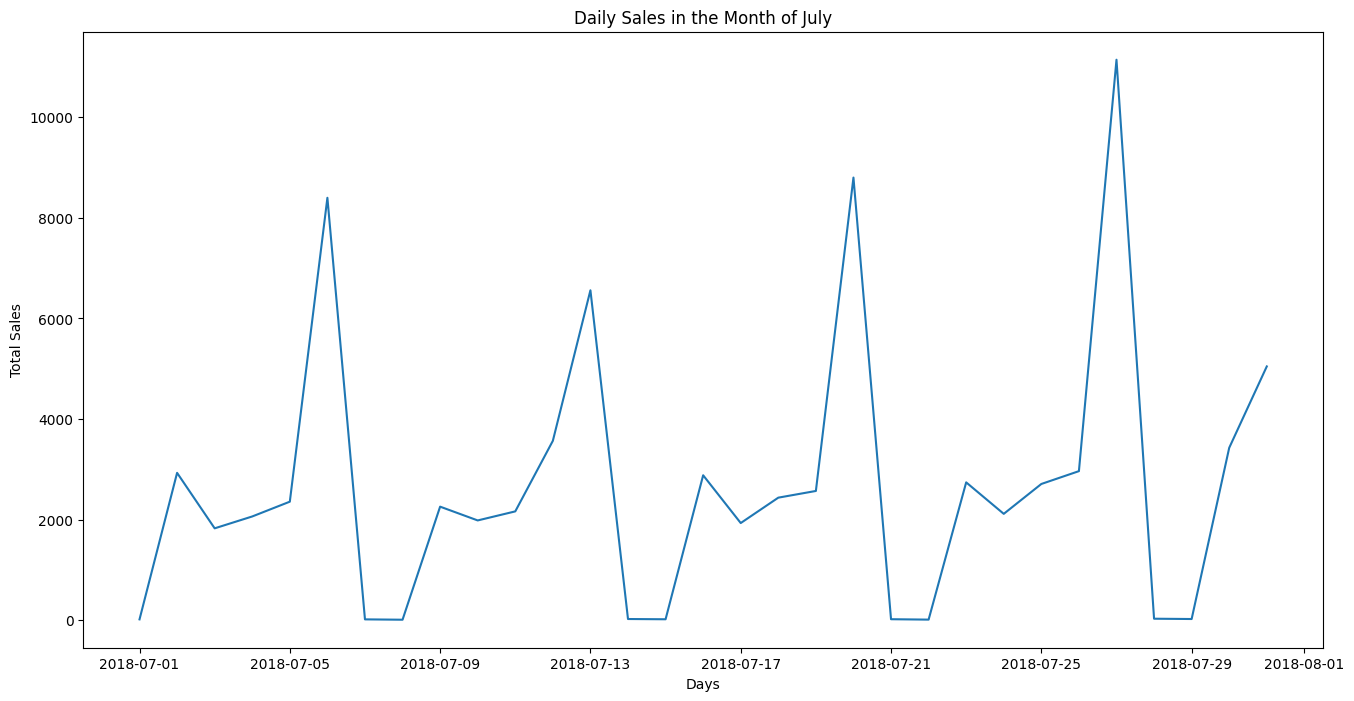

In [ ]:
plt.rcParams['figure.figsize']=(16,8)
plt.plot(daily_sales_volume)
plt.title('Daily Sales in the Month of July')
plt.xlabel('Days')
plt.ylabel('Total Sales')

# Problem 3: Compare the daily Sales volume of different property type in July

In [ ]:
daily_sales_for_diff_prop=july_df.groupby(['sale date','property type'])['TID'].count().unstack()
daily_sales_for_diff_prop

property type,D,F,S,T
sale date,,,,
2018-07-01,4,2,7,5
2018-07-02,705,564,782,880
2018-07-03,443,426,436,523
2018-07-04,529,401,528,606
2018-07-05,623,453,614,668
2018-07-06,1955,1662,2422,2361
2018-07-07,7,6,2,3
2018-07-08,2,4,1,4
2018-07-09,498,447,638,676


Text(0.5, 0, 'Date')

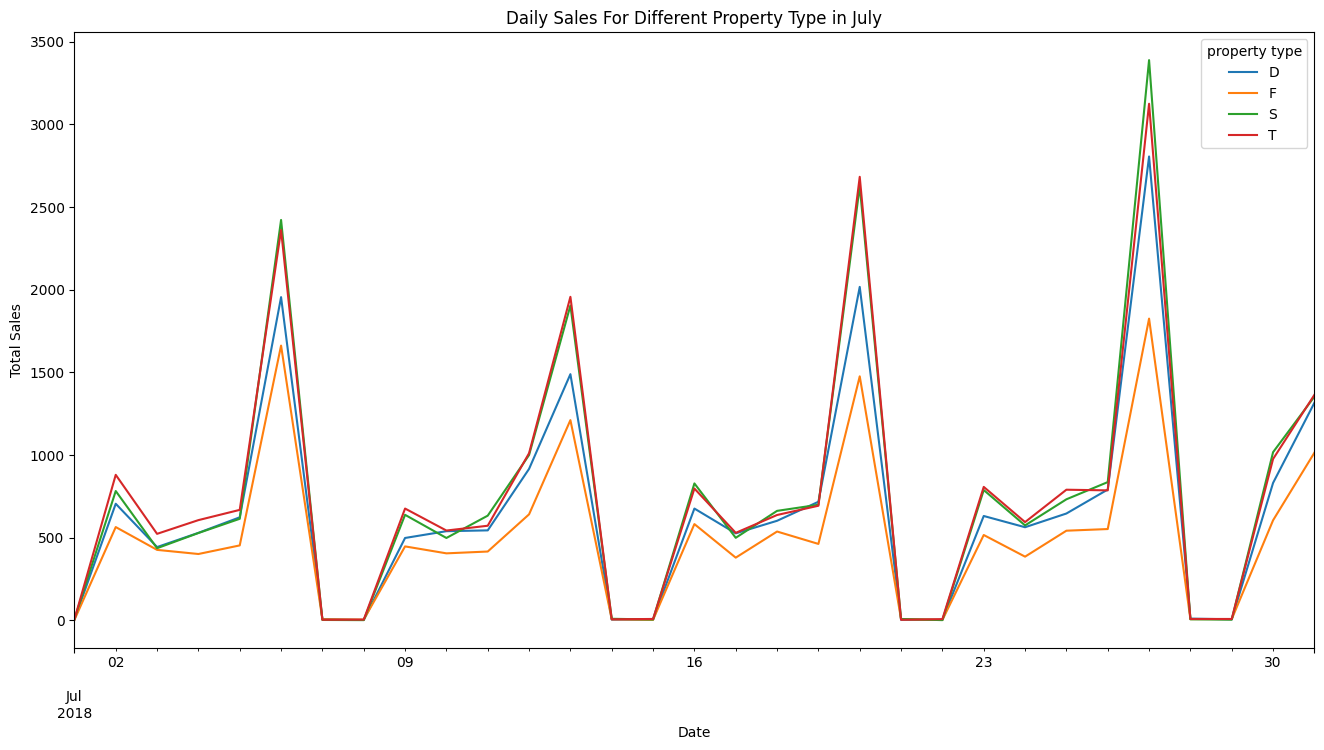

In [ ]:
daily_sales_for_diff_prop.plot()
plt.title('Daily Sales For Different Property Type in July')
plt.ylabel('Total Sales')
plt.xlabel('Date')

# 4: Draw Comparisons among different property types in terms of sales

In [ ]:
property_wise_sales=df['property type'].value_counts()
property_wise_sales

property type
T    274610
S    268026
D    233324
F    183043
Name: count, dtype: int64

<Axes: xlabel='property type'>

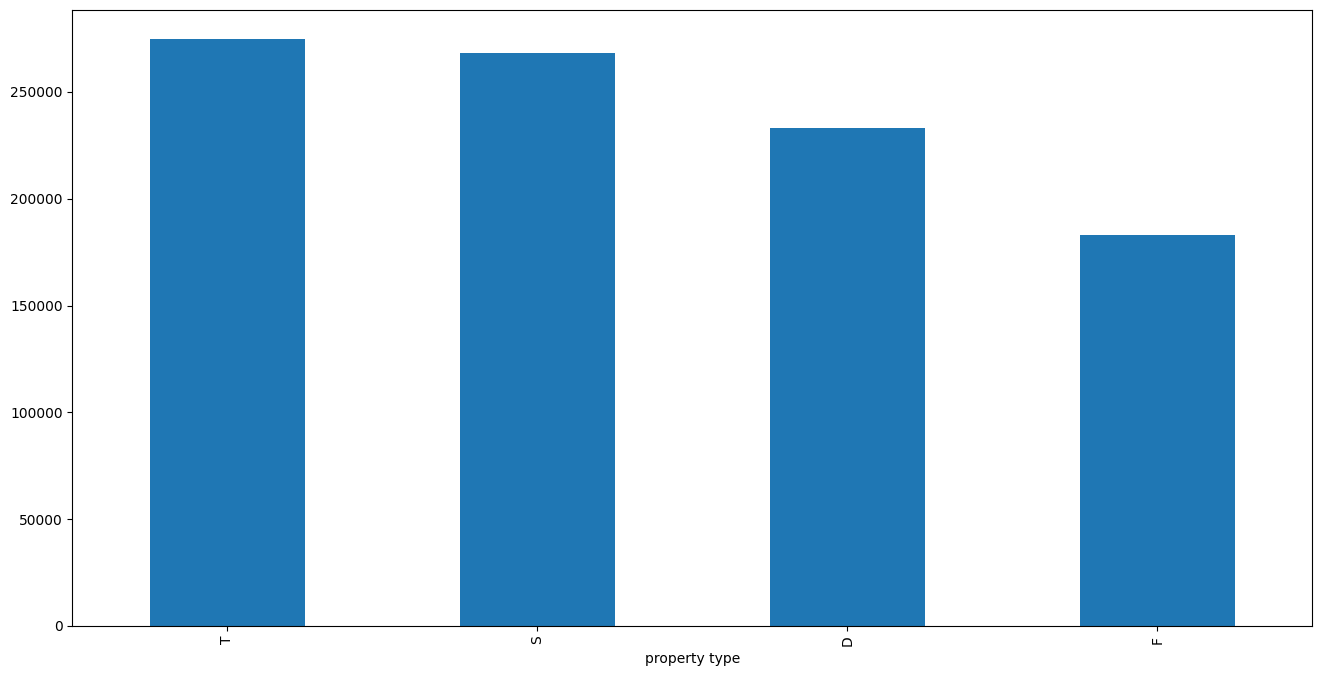

In [ ]:
property_wise_sales.plot(kind='bar')
